# **Importing Dependencies**

In [69]:
# TensorFlow is an open source machine learning library
import tensorflow as tf

# NumPy is a math library 
import numpy as np

# Matplotlib is a graphing library
import matplotlib.pyplot as plt 

# math is Python's math library 
import math

# Generating Data

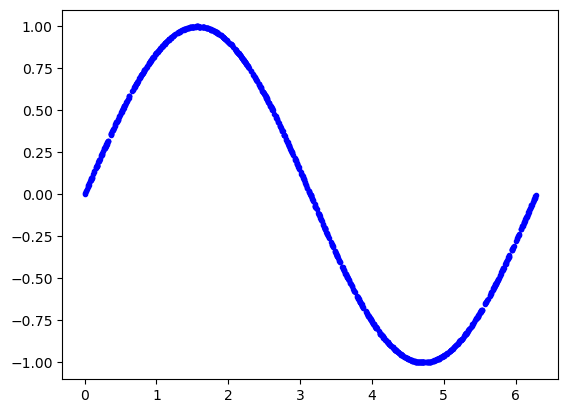

In [70]:
# generate 1000 data points
SAMPLES = 1000

# use RNG seed 1337
SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Generate a uniformly distributed set of random numbers in the range from 
# 0 to 2π, which covers a complete sine wave oscillation
x_values = np.random.uniform(low=0, high=2*math.pi, size=SAMPLES)

# Shuffle the values to guarantee they're not in order
np.random.shuffle(x_values)

# Calculate the corresponding sine values
y_values = np.sin(x_values)

# Plot our data. The 'b.' argument tells the library to print blue dots.
plt.plot(x_values, y_values, 'b.')
plt.show()

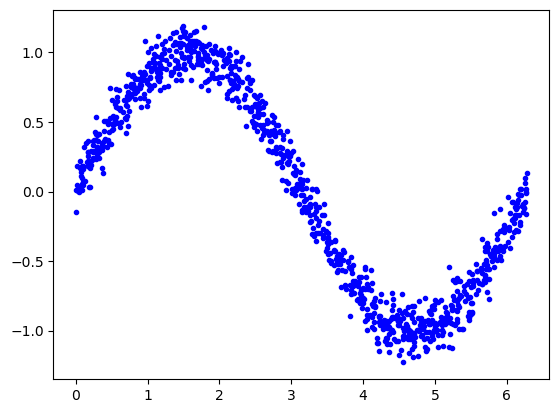

In [71]:
# Add a small random number to each y value
y_values += 0.1 * np.random.randn(*y_values.shape)

# Plot our data
plt.plot(x_values, y_values, 'b.')
plt.show()

# Splitting the Data

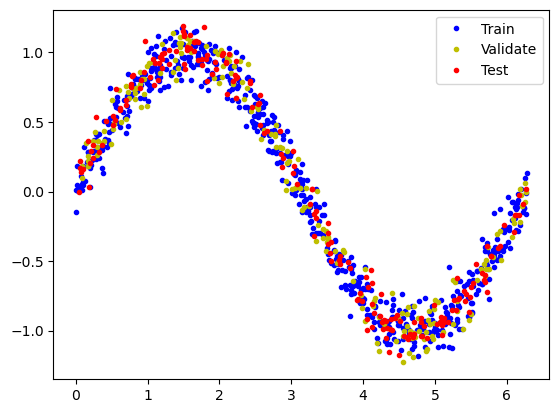

In [72]:
# We'll use 60% of our data for training and 20% for testing. The remaining 20% 
# will be used for validation. Calculate the indices of each section. 
TRAIN_SPLIT = int(0.6 * SAMPLES)
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)

# Use np.split to chop our data into three parts.
# The second argument to np.split is an array of indices where the data will be # split. We provide two indices, so the data will be divided into three chunks. 
x_train, x_validate, x_test = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT]) 
y_train, y_validate, y_test = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])

# Double check that our splits add up correctly
assert (x_train.size + x_validate.size + x_test.size) == SAMPLES

# Plot the data in each partition in different colors:
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_validate, y_validate, 'y.', label="Validate")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.legend()
plt.show()

# Define a Basic Model

In [73]:
# We'll use Keras to create a simple model architecture
from tensorflow.keras import layers 
model_1 = tf.keras.Sequential()

# First layer takes a scalar input and feeds it through 16 "neurons." The
# neurons decide whether to activate based on the 'relu' activation function. 
model_1.add(layers.Dense(16, activation='relu', input_shape=(1,)))

# Final layer is a single neuron, since we want to output a single value
model_1.add(layers.Dense(1))

# Compile the model using a standard optimizer and loss function for regression
model_1.compile(optimizer='rmsprop', loss='mse', metrics=['mae']) 

# Print a summary of the model's architecture
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


# Train Our Model

In [74]:
history_1 = model_1.fit(x_train, y_train, epochs=1000, batch_size=16,
    validation_data=(x_validate, y_validate))

l_loss: 0.1584 - val_mae: 0.3067
Epoch 852/1000
38/38 [==============================] - 0s 1ms/step - loss: 0.1468 - mae: 0.2999 - val_loss: 0.1603 - val_mae: 0.3143
Epoch 853/1000
38/38 [==============================] - 0s 1ms/step - loss: 0.1417 - mae: 0.2896 - val_loss: 0.1573 - val_mae: 0.3094
Epoch 854/1000
38/38 [==============================] - 0s 1ms/step - loss: 0.1526 - mae: 0.3059 - val_loss: 0.1587 - val_mae: 0.3068
Epoch 855/1000
38/38 [==============================] - 0s 1ms/step - loss: 0.1636 - mae: 0.3106 - val_loss: 0.1598 - val_mae: 0.3062
Epoch 856/1000
38/38 [==============================] - 0s 1ms/step - loss: 0.1467 - mae: 0.2999 - val_loss: 0.1574 - val_mae: 0.3088
Epoch 857/1000
38/38 [==============================] - 0s 1ms/step - loss: 0.1552 - mae: 0.3079 - val_loss: 0.1573 - val_mae: 0.3093
Epoch 858/1000
38/38 [==============================] - 0s 1ms/step - loss: 0.1567 - mae: 0.3083 - val_loss: 0.1581 - val_mae: 0.3071
Epoch 859/1000
38/38 [=======

# Graph the History

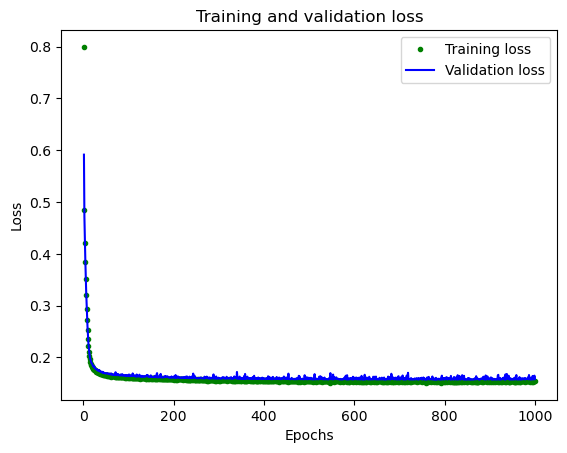

In [75]:
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

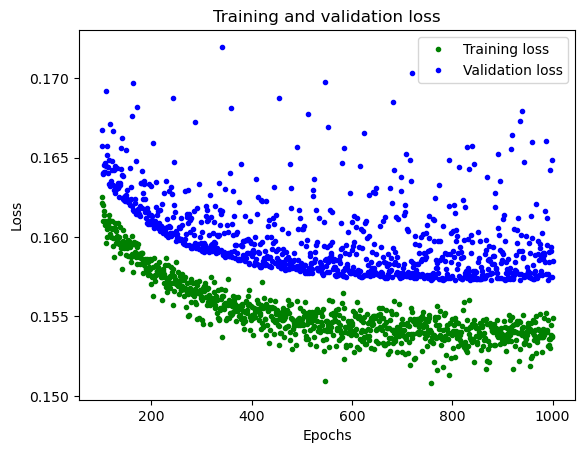

In [76]:
# Exclude the first few epochs so the graph is easier to read
SKIP = 100
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

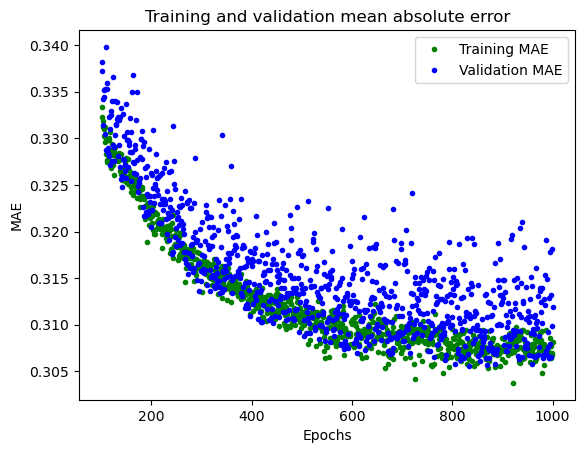

In [77]:
# Draw a graph of mean absolute error, which is another way of # measuring the amount of error in the prediction.
mae = history_1.history['mae']
val_mae = history_1.history['val_mae']
plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

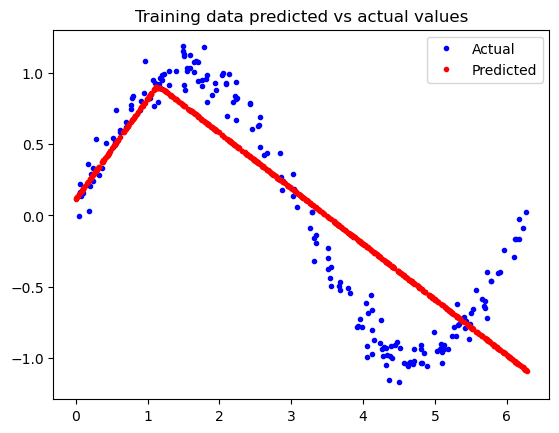

In [78]:
# Use the model to make predictions from our validation data
predictions = model_1.predict(x_train)
# Plot the predictions along with the test data
plt.clf()
plt.title('Training data predicted vs actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_train, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()

# Improve the model

In [79]:
model_2 = tf.keras.Sequential()

# First layer takes a scalar input and feeds it through 16 "neurons." The
# neurons decide whether to activate based on the 'relu' activation function. 
model_2.add(layers.Dense(16, activation='relu', input_shape=(1,)))

# The new second layer may help the network learn more complex representations
model_2.add(layers.Dense(16, activation='relu'))

# Final layer is a single neuron, since we want to output a single value
model_2.add(layers.Dense(1))

# Compile the model using a standard optimizer and loss function for regression
model_2.compile(optimizer='rmsprop', loss='mse', metrics=['mae']) 

# Show a summary of the model
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_8 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 17        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [80]:
history_2 = model_2.fit(x_train, y_train, epochs=600, batch_size=16,
                         validation_data=(x_validate, y_validate))

 mae: 0.0888 - val_loss: 0.0144 - val_mae: 0.0980
Epoch 451/600
38/38 [==============================] - 0s 1ms/step - loss: 0.0105 - mae: 0.0822 - val_loss: 0.0115 - val_mae: 0.0847
Epoch 452/600
38/38 [==============================] - 0s 1ms/step - loss: 0.0127 - mae: 0.0905 - val_loss: 0.0137 - val_mae: 0.0917
Epoch 453/600
38/38 [==============================] - 0s 1ms/step - loss: 0.0113 - mae: 0.0849 - val_loss: 0.0182 - val_mae: 0.1037
Epoch 454/600
38/38 [==============================] - 0s 2ms/step - loss: 0.0113 - mae: 0.0841 - val_loss: 0.0122 - val_mae: 0.0874
Epoch 455/600
38/38 [==============================] - 0s 1ms/step - loss: 0.0123 - mae: 0.0879 - val_loss: 0.0110 - val_mae: 0.0828
Epoch 456/600
38/38 [==============================] - 0s 1ms/step - loss: 0.0110 - mae: 0.0838 - val_loss: 0.0118 - val_mae: 0.0865
Epoch 457/600
38/38 [==============================] - 0s 1ms/step - loss: 0.0117 - mae: 0.0861 - val_loss: 0.0131 - val_mae: 0.0900
Epoch 458/600
38/38

# Review the Data

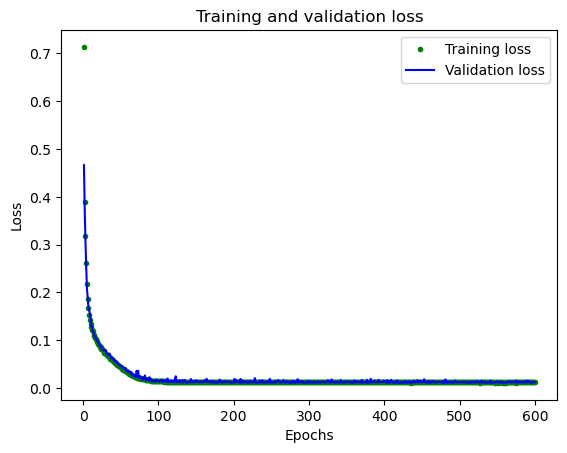

In [81]:
plt.clf()
# Draw a graph of the loss, which is the distance between
# the predicted and actual values during training and validation. 
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

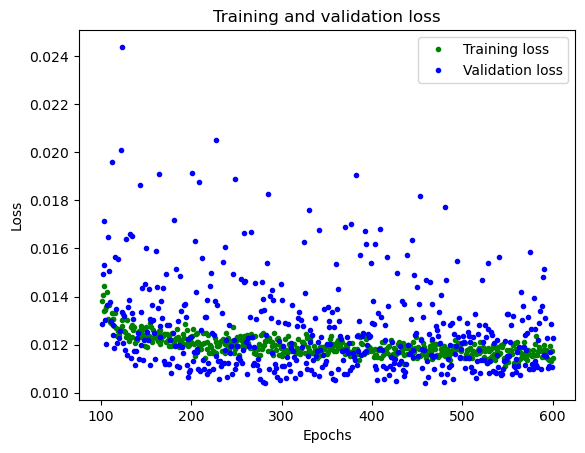

In [82]:
# Exclude the first few epochs so the graph is easier to read
SKIP = 100
plt.clf()
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

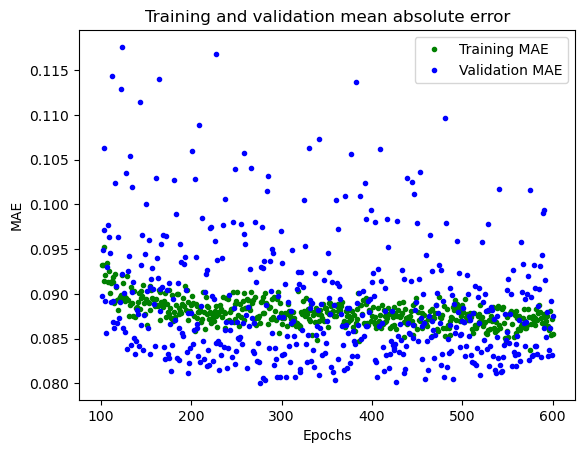

In [83]:
plt.clf()
# Draw a graph of mean absolute error, which is another way of # measuring the amount of error in the prediction.
mae = history_2.history['mae']
val_mae = history_2.history['val_mae']
plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

# Testing

7/7 [==============================] - 0s 880us/step - loss: 0.0101 - mae: 0.0791


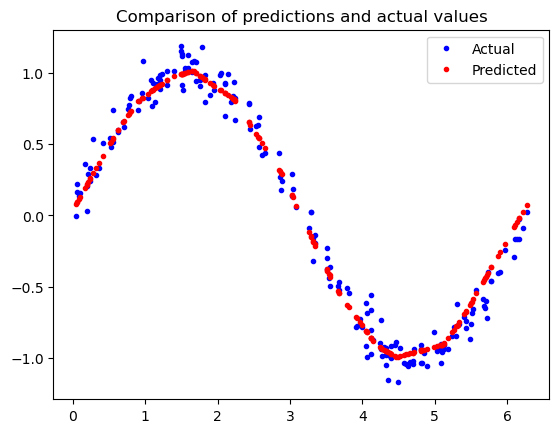

In [84]:
# Calculate and print the loss on our test dataset
loss = model_2.evaluate(x_test, y_test)

# Make predictions based on our test dataset
predictions = model_2.predict(x_test)

# Graph the predictions against the actual values
plt.clf()
plt.title('Comparison of predictions and actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_test, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()

# Convert the model to use in TensorFlow Lite

In [85]:
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model_2)
tflite_model = converter.convert()

# Save the model to disk
open("sine_model.tflite", "wb").write(tflite_model)

# Convert the model to the TensorFlow Lite format with quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model_2) 

# Indicate that we want to perform the default optimizations, 
# which include quantization
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Define a generator function that provides our test data's x values 
# as a representative dataset, and tell the converter to use it
def representative_dataset_generator():
    for value in x_test:
        # Each scalar value must be inside of a 2D array that is wrapped in a list 
        yield [np.array(value, dtype=np.float32, ndmin=2)]

converter.representative_dataset = representative_dataset_generator 

# Convert the model
tflite_model = converter.convert()

# Save the model to disk
open("sine_model_quantized.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: /var/folders/hs/9lqql2q14qj0fgpfdbfn3j000000gn/T/tmp5a5ppgfw/assets
INFO:tensorflow:Assets written to: /var/folders/hs/9lqql2q14qj0fgpfdbfn3j000000gn/T/tmp5a5ppgfw/assets
INFO:tensorflow:Assets written to: /var/folders/hs/9lqql2q14qj0fgpfdbfn3j000000gn/T/tmpaysehvuj/assets
INFO:tensorflow:Assets written to: /var/folders/hs/9lqql2q14qj0fgpfdbfn3j000000gn/T/tmpaysehvuj/assets


2960

# Test the converted model for accuracy

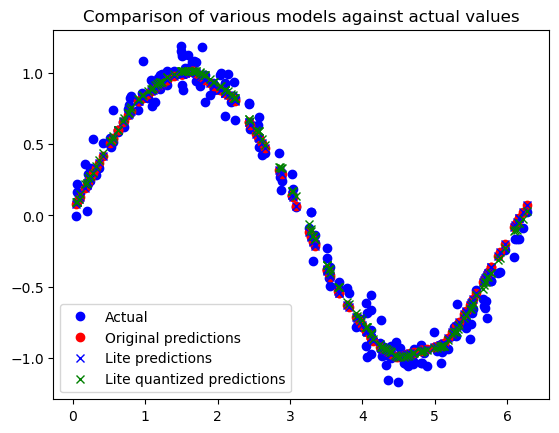

In [86]:
# Instantiate an interpreter for each model
sine_model = tf.lite.Interpreter('sine_model.tflite')
sine_model_quantized = tf.lite.Interpreter('sine_model_quantized.tflite')

# Allocate memory for each model
sine_model.allocate_tensors()
sine_model_quantized.allocate_tensors()

# Get indexes of the input and output tensors
sine_model_input_index = sine_model.get_input_details()[0]["index"]
sine_model_output_index = sine_model.get_output_details()[0]["index"]
sine_model_quantized_input_index = sine_model_quantized.get_input_details()[0]["index"]
sine_model_quantized_output_index = sine_model_quantized.get_output_details()[0]["index"]

# Create arrays to store the results
sine_model_predictions = []
sine_model_quantized_predictions = []

# Run each model's interpreter for each value and store the results in arrays
for x_value in x_test:
    # Create a 2D tensor wrapping the current x value
    x_value_tensor = tf.convert_to_tensor([[x_value]], dtype=np.float32) 
    
    # Write the value to the input tensor 
    sine_model.set_tensor(sine_model_input_index, x_value_tensor)
    
    # Run inference
    sine_model.invoke()
    
    # Read the prediction from the output tensor
    sine_model_predictions.append(
          sine_model.get_tensor(sine_model_output_index)[0])
    
    # Do the same for the quantized model
    sine_model_quantized.set_tensor\
        (sine_model_quantized_input_index, x_value_tensor)
    sine_model_quantized.invoke()
    sine_model_quantized_predictions.append(
        sine_model_quantized.get_tensor(sine_model_quantized_output_index)[0])


# See how they line up with the data
plt.clf()
plt.title('Comparison of various models against actual values')
plt.plot(x_test, y_test, 'bo', label='Actual')
plt.plot(x_test, predictions, 'ro', label='Original predictions')
plt.plot(x_test, sine_model_predictions, 'bx', label='Lite predictions')
plt.plot(x_test, sine_model_quantized_predictions, 'gx', \
    label='Lite quantized predictions')
plt.legend()
plt.show()

# Evaluate the tflite models

In [87]:
import os
basic_model_size = os.path.getsize("sine_model.tflite")
print("Basic model is %d bytes" % basic_model_size)

quantized_model_size = os.path.getsize("sine_model_quantized.tflite") 
print("Quantized model is %d bytes" % quantized_model_size)

difference = basic_model_size - quantized_model_size 
print("Difference is %d bytes" % difference)

Basic model is 2892 bytes
Quantized model is 2960 bytes
Difference is -68 bytes
